In [20]:
import numpy as np
import matplotlib.pyplot as plt
import imageio
import eksplisitt  as eks
import ImageView as imv
import scipy.misc

In [22]:
def function(m):
    r = m[0::2, 0::2]
    g = np.clip((m[0::2, 1::2] // 2 + m[1::2, 0::2] // 2), a_min = 0, a_max = 2**14-1)
    b = m[1::2, 1::2]
    return np.dstack([r, g, b])

def demosaicing(file):
    original =  imageio.imread(file)
    #original = original[70::-1, 170::-1]
    
    mosaic = np. zeros(original.shape[:2]) # Alloker plass
    mosaic[ ::2 , ::2] = original[ ::2 , ::2 , 0] # R- kanal
    mosaic[1::2 , ::2] = original[1::2 , ::2 , 1] # G- kanal
    mosaic[ ::2 , 1::2] = original[ ::2 , 1::2 , 1] # G- kanal
    mosaic[1::2 , 1::2] = original[1::2 , 1::2 , 2] # B- kanal
    
    plt.imshow(original)
    plt.show()
    plt.imshow(mosaic, plt.cm.gray)
    plt.show()
    
    new = function(mosaic)
#    new = np.zeros(original.shape)
#    new[ ::2 , ::2, 0] = mosaic[ ::2 , ::2]
#    new[1::2 , ::2, 1] = mosaic[1::2 , ::2]
#    new[ ::2 , 1::2, 1] = mosaic[ ::2 , 1::2]
#    new[1::2 , 1::2, 2] = mosaic[1::2 , 1::2]
#    newcopy = new
    
#    mask = np.zeros(new.shape)     #lag maske
#    mask[ ::2 , ::2, 0] = 1
#    mask[1::2 , ::2, 1] = 1
#    mask[ ::2 , 1::2, 1] = 1
#    mask[1::2 , 1::2, 2] = 1
#    
#    mask = mask.astype(bool)
#   new = eks.eksplisitt(new, n=20)  #løs
#   new[mask] = newcopy[mask]
    
    #plt.figure(figsize=(70,70))
    plt.imshow(new)
    plt.show()

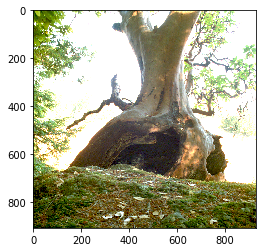

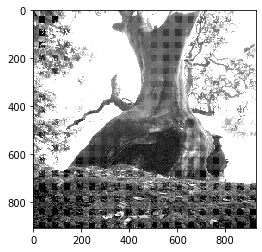

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


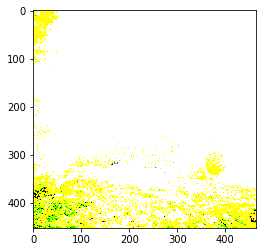

In [23]:
filepath = "..\hdr-bilder\Tree\Tree_00256.png"

demosaicing(filepath)